In [26]:
import pandas as pd
import seaborn as sns
import seaborn as sns

In [12]:
"""Lets create synthetic data points"""
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3.0)

In [13]:
pd.DataFrame(X)[0]

0     -1.754081
1     -1.078167
2     -0.793714
3     -0.525664
4      0.935139
         ...   
995   -0.504472
996    1.977824
997   -0.815188
998    0.222944
999    1.159937
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

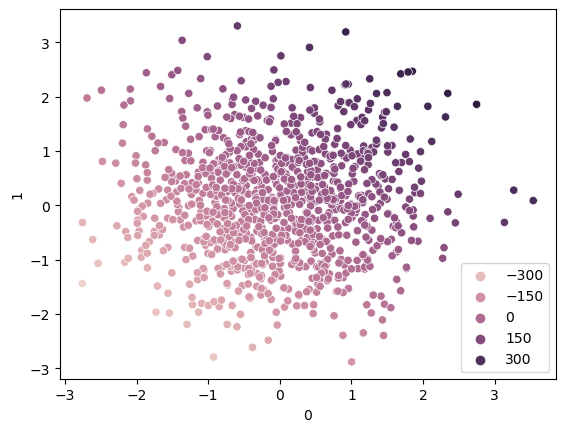

In [14]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [16]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')

svr.fit(X_train,y_train)

SVR(kernel='linear')

In [17]:
svr.coef_

array([[87.30362772, 87.64102505]])

In [18]:
"""Prediction"""
y_pred = svr.predict(X_test)
y_pred

array([ 6.21670061e+01, -6.25596379e+01, -9.95337004e+01, -2.04529975e+01,
        2.58342615e+01,  1.81218727e+01,  1.50487801e+02,  9.62275924e+01,
       -1.54737876e+02,  6.17731931e+01, -3.36021351e+01,  2.46641476e+02,
       -2.51092600e+01,  1.19994867e+02,  1.12768999e+01, -7.53857039e+01,
        1.48675285e+02, -3.08244349e+02, -2.78135124e+01, -1.31246889e+02,
        7.79368375e+01,  3.36629008e+01, -1.38015417e+02,  6.38942765e+01,
       -5.98923969e+01, -2.53247323e+02,  4.70130261e+01, -3.32652878e+01,
        8.03914713e+01,  1.32298799e+02, -3.93536242e+01, -8.12125146e+01,
       -8.86645025e+01,  4.76974041e+01,  6.61889295e+01, -3.66762020e+02,
        5.34359043e+01, -1.46677068e+02, -6.41015657e+00,  7.50517167e+00,
       -2.52399010e+02,  6.97732142e+01, -3.75756746e+01, -9.22153160e+01,
        3.35666381e+01, -2.27847141e+02, -2.36995904e+02, -6.82430088e+01,
       -3.96407120e+01,  1.40996723e+02, -2.30891806e+01, -1.75097351e+02,
       -9.32543386e+00,  

In [19]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.9993946337540629


### Hyperparameter Tuning With SVR

In [21]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [22]:
grid = GridSearchCV(SVR(), param_grid=param_grid, refit=True, cv=5, verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.609 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.614 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.612 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.632 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.609 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.614 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.612 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.632 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [24]:
grid.best_params_

{'C': 100, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [25]:
## Prediction
y_pred4 = grid.predict(X_test)
print(r2_score(y_test, y_pred4))

0.9994249907132672
